# Simple Application of Bayes Theorem
## US Veteran Suicide Probability

### 1. Understading Bayes Theorem

Bayes Theorem:

P(A|B) = ( P(B|A)*P(A) ) / P(B)


For this project:

Events:

- A = Person dies by suicide
- B = Person is a U.S military veteran

Probabilities:

- P(A) = Probability of suicide in U.S population
- P(B) = Prob of being a veteran in the U.S
- P(A|B) = Prob of suicide given the person is U.S veterans (goal to work out)
- P(B|A) = Prob of a person being a veteran given they died by suicide

### 2. Data

Source data from reputable sources.

All data will be from 2022.

- U.S Population, U.S Census Bureau = 333_000_000
- Number of veterans, U.S Department of Veterans Affairs = 16_500_000
- Suicide in U.S population, CDC National Center for Health Statistics = 46_476
- Veteran suicides, U.S Department of Veterans Affairs = 6_392

References:

- VA 2024 National Veteran Suicide Prevention Annual Report (released December 2024, covering 2001–2022 data).
- CDC National Center for Health Statistics, WONDER Database (2022 suicide data).
- U.S. Census Bureau population estimates.



### 3. Manual Calculations

#### Probability of suicide in U.S population

- P(A) = total suicides / total us population
     - = 46_476 / 333_000_000
     - = 0.0001486

#### P(B) = Prob of being a veteran in the U.S

- P(B) = veterans / total us population
     - = 16_500_00 / 333_000_000
     - = 0.04955

####  P(B|A) = Prob being a veteran given suicide

- P(B|A) = veteran suicides / total suicides
     - = 6_392 / 49_476
     - = 0.1292

#### P(A|B) = Prob of suicide given person is veteran - bayes theorem

- P(A|B) = ( P(B|A) * P(A) ) / P(B)
     - = ( 0.1292 * 0.0001486 ) / 0.04955
     - = 0.0003876

### 4. Python Implementation

Probability of suicide (general population): 0.0001486
Probability of being a veteran: 0.04955
Probability of veteran given suicide: 0.12919
Probability of suicide given veteran: 0.0003874
Veterans are 2.61 times more likely to die by suicide.


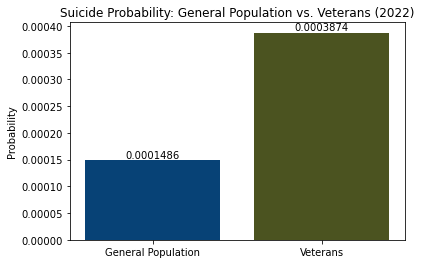

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data (2022)
total_population = 333_000_000
total_suicides = 49_476
veteran_population = 16_500_000
veteran_suicides = 6_392

# Probabilities
P_A = total_suicides / total_population  # P(suicide)
P_B = veteran_population / total_population  # P(veteran)
P_B_given_A = veteran_suicides / total_suicides  # P(veteran | suicide)

# Bayes' Theorem: P(A|B) = P(B|A) * P(A) / P(B)
P_A_given_B = (P_B_given_A * P_A) / P_B  # P(suicide | veteran)

# Output results
print(f"Probability of suicide (general population): {P_A:.7f}")
print(f"Probability of being a veteran: {P_B:.5f}")
print(f"Probability of veteran given suicide: {P_B_given_A:.5f}")
print(f"Probability of suicide given veteran: {P_A_given_B:.7f}")
print(f"Veterans are {P_A_given_B / P_A:.2f} times more likely to die by suicide.")

# Plot
labels = ['General Population', 'Veterans']
probs = [P_A, P_A_given_B]
plt.bar(labels, probs, color=['#074276', '#4B5320'])
plt.title('Suicide Probability: General Population vs. Veterans (2022)')
plt.ylabel('Probability')
plt.text(0, P_A + 0.000005, f"{P_A:.7f}", ha='center')
plt.text(1, P_A_given_B + 0.000005, f"{P_A_given_B:.7f}", ha='center')
plt.show()

Probability of suicide (general population): 0.0001486
Probability of suicide given veteran: 0.0003874
Chances per million (general population): 148.58
Chances per_million (veterans): 387.39
Veterans are 2.61 times more likely to die by suicide.


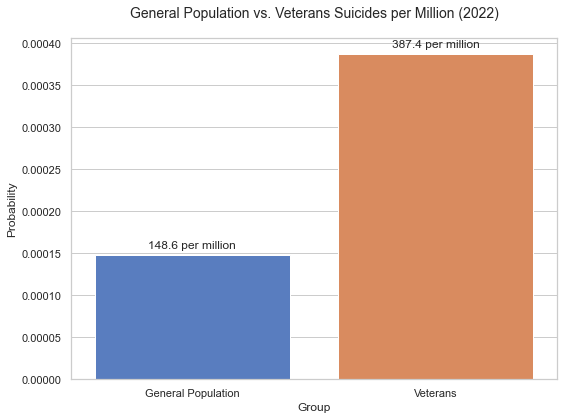

In [ ]:
# Chances per million
suicide_per_million_general = P_A * 1_000_000
suicide_per_million_veteran = P_A_given_B * 1_000_000

# Output results
print(f"Probability of suicide (general population): {P_A:.7f}")
print(f"Probability of suicide given veteran: {P_A_given_B:.7f}")
print(f"Chances per million (general population): {suicide_per_million_general:.2f}")
print(f"Chances per_million (veterans): {suicide_per_million_veteran:.2f}")
print(f"Veterans are {P_A_given_B / P_A:.2f} times more likely to die by suicide.")

# Seaborn plot
sns.set(style="whitegrid") 
data = {'Group': ['General Population', 'Veterans'], 
        'Probability': [P_A, P_A_given_B]}
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Group', y='Probability', data=data, palette='muted')

# Add text annotations with chances per million
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.000005,
            f'{[suicide_per_million_general, suicide_per_million_veteran][i]:.1f} per million',
            ha='center', va='bottom')

# plot
plt.title('General Population vs. Veterans Suicides per Million (2022)', fontsize=14, pad=20)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Group', fontsize=12)
plt.tight_layout()

plt.show()